## Making plots

This notebook is to use the ranked riders data to make plots to visualize the selected rider's ranking.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '../src/ranked/ranked.csv'

# Read the CSV file into a DataFrame
ranked_dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(ranked_dataframe.head())

                       Namn         Klubb     #         Klass  \
0             Albin Elowson   FMCK Skövde     1          Elit   
1  Simon Hopander Ankarhake  Nyköpings MS   304  Motion 16-29   
2            Sören Fransson      Kinds MK  1236  Motion 50-59   
3            Niklas Persson  Karlskoga EK    28        Senior   
4            Rikard Hansson      Tibro MK    73        Senior   

   Rank FMK Skövde  Rank Tidaholms MK  Rank Töreboda MK  Rank Tibro MK  \
0            133.0                NaN               1.0            NaN   
1            189.0                NaN               NaN            NaN   
2              NaN                1.0               NaN            NaN   
3              NaN                NaN               2.0            NaN   
4              NaN                NaN               3.0            NaN   

   Rank Carlsborgs MK  Rank Falköpings MK  AvgRank  
0                 NaN                 NaN      1.0  
1                 NaN                 1.0      1.0  
2    

## Find one rider.
Test to find data for one rider. In this case me (Robert Ahlin).

In [5]:
def display_row_by_name(name):
    row = ranked_dataframe[ranked_dataframe['Namn'] == name]
    if not row.empty:
        print(row)
    else:
        print(f"No data found for '{name}'.")

# Example: Displaying row for a specific name
display_row_by_name('Robert Ahlin')

             Namn          Klubb    #         Klass  Rank FMK Skövde  \
374  Robert Ahlin  Falköpings MK  919  Motion 40-49            123.0   

     Rank Tidaholms MK  Rank Töreboda MK  Rank Tibro MK  Rank Carlsborgs MK  \
374                NaN             304.0          220.0                 NaN   

     Rank Falköpings MK  AvgRank  
374                 NaN    171.5  


## Show line chart for selected riders.
Testing show a line chart for several selected riders.

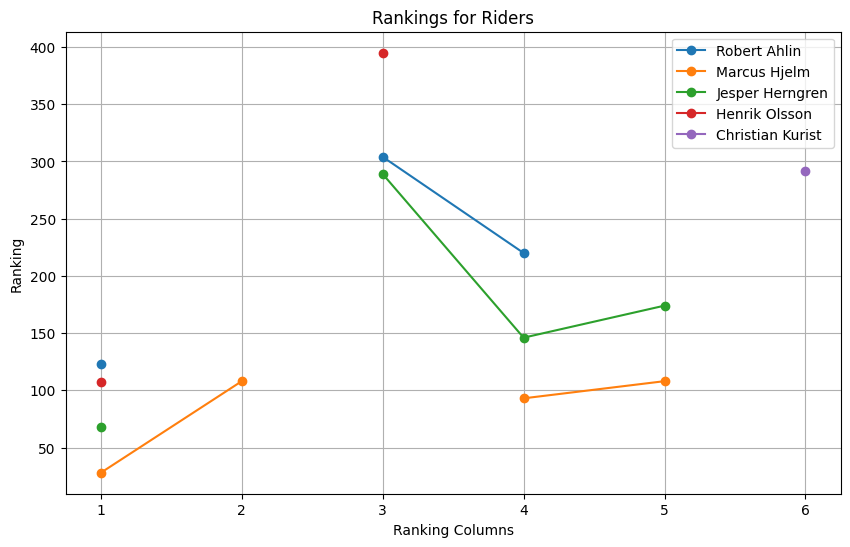

In [6]:
# Function to plot rankings for specific riders
def plot_rankings(dataframe, rider_names):
    plt.figure(figsize=(10, 6))

    for rider_name in rider_names:
        # Filter data for the rider
        rider_data = dataframe[dataframe['Namn'] == rider_name]

        # Get ranking columns
        ranking_columns = [col for col in rider_data.columns if col.startswith('Rank')]

        # Convert columns to numeric using .loc to avoid SettingWithCopyWarning
        for col in ranking_columns:
            rider_data.loc[:, col] = pd.to_numeric(rider_data[col], errors='coerce')


        # Extract rider's rankings
        rankings = rider_data[ranking_columns].fillna(np.nan).values.flatten().astype(float)

        # Plot rankings as a line chart for each rider
        plt.plot(range(1, len(rankings) + 1), rankings, marker='o', label=rider_name)

    plt.xlabel('Ranking Columns')
    plt.ylabel('Ranking')
    plt.title('Rankings for Riders')
    plt.legend()
    plt.grid(True)  # Add grid lines
    plt.show()

# Example: Plot rankings for multiple riders
riders_to_plot = ['Robert Ahlin', 'Marcus Hjelm', 'Jesper Herngren', 'Henrik Olsson', 'Christian Kurist']
plot_rankings(ranked_dataframe, riders_to_plot)

## Look up all different clubbs in "Klubb" column

In [7]:
# Get unique Klubb values from ranked_dataframe
unique_klubbs = ranked_dataframe['Klubb'].unique()
print(unique_klubbs)

['FMCK Skövde' 'Nyköpings MS' 'Kinds MK' 'Karlskoga EK' 'Tibro MK'
 'SMK Trollhättan' 'Linköpings MS' 'Falköpings MK' 'Kullings MS'
 'Tidaholms MK' 'Hallsbergs MK' 'SMK Vingåker' 'Försvarsmaktens EK'
 'Götene MK' 'MK Orion' 'Norrahammars MK' 'BMK Uddevalla' 'Örebro EK'
 'FMCK Hässleholm' 'SMK Värnamo' 'Skene MS' 'Laxå MK' 'Göta MS'
 'Älvbygdens MK' 'Hjo MK' 'Tranås MS' 'Gotland Enduro Cross MS'
 'Vimmerby MS' 'Huskvarna MK' 'FMCK Borås' 'Lilla Edets MCK'
 'Battle of Vikings Sportförening' 'Finspångs MS' 'Djursdala SK'
 'Carlsborgs MK' 'Solshesters MCK' 'MK Pionjär' 'Kristdala MS'
 'MC Alingsås' 'Notodden Crossklubb' 'Borg mc klubb' 'Bodafors MK'
 'Töreboda MK' 'Stenungsunds MS' 'Björkö EK' 'Kortedala MK' 'SMK Eksjö'
 'Varbergs MK' 'Karlstad MX Klubb' 'Bengtsfors MCC' 'Flittig' 'Wäxjö MS'
 'SMK Östgöta' 'Team Westom Motorcykel' 'Fjugesta MS' 'SMK Kolmården'
 'FMCK Strängnäs' 'Mariestads EK' 'Jevnaker MK' 'Ulricehamns MK'
 'Tranemo MK' 'Åbågen MCK' 'Kungsbacka MA' 'MCK Hallandia' 'SMK Va

## Create a line chart from a selected Club (Falköpings MK)

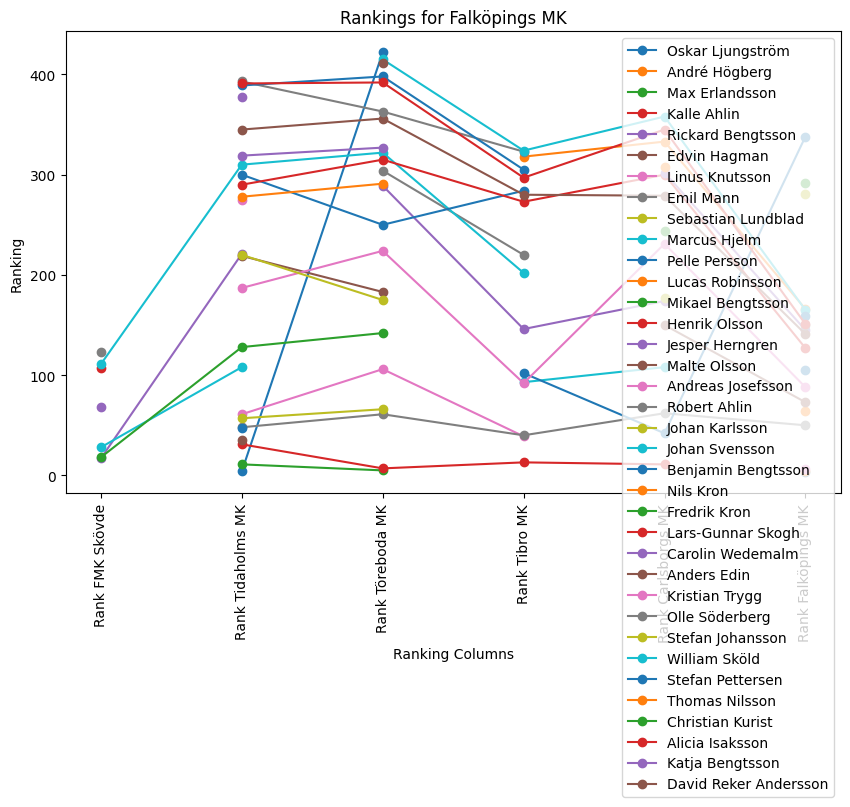

In [8]:
import matplotlib.pyplot as plt

# Select a specific Klubb
selected_klubb = 'Falköpings MK'

# Filter data for the selected Klubb
klubb_data = ranked_dataframe[ranked_dataframe['Klubb'] == selected_klubb]

# Get all 'Namn' values for the selected Klubb
namn_values = klubb_data['Namn'].tolist()

# Extract column names for Rank values (finding columns starting with 'Rank')
rank_columns = [col for col in klubb_data.columns if col.startswith('Rank')]

# Plot Rank values for each 'Namn' in the selected Klubb
plt.figure(figsize=(10, 6))

for namn in namn_values:
    # Filter data for each 'Namn'
    rider_data = klubb_data[klubb_data['Namn'] == namn][rank_columns].values.flatten()
    
    # Plot the 'Rank' values for each 'Namn'
    plt.plot(rank_columns, rider_data, marker='o', label=namn)

plt.xlabel('Ranking Columns')
plt.ylabel('Ranking')
plt.title(f'Rankings for {selected_klubb}')
plt.legend()
plt.xticks(rank_columns, rotation=90)  # Set the x-axis ticks to Rank column names
plt.show()